In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
FEATURES_SOURCE = 'pca_advanced_features'
train = pd.read_csv('./data/{}/train.csv'.format(FEATURES_SOURCE), index_col=0)
test = pd.read_csv('./data/{}/test.csv'.format(FEATURES_SOURCE), index_col=0)


In [4]:
train_X = train.drop('target', axis=1)
train_Y = train[['target']]
test_X = test.drop('target', axis=1)
test_Y = test[['target']]


In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [6]:
from utils.metrics import get_metrics
from utils.metrics import get_metrics_kfold


<h3> Hyper Parameters Tuning </h3>

In [7]:
train_errors = []
cnt = 0
test_errors = []
cross_val_scores = []
n_neighbours = [3, 5, 10, 20, 100]
for n_neighbour in n_neighbours:
    knn = KNeighborsClassifier(n_neighbors=n_neighbour, algorithm='auto', weights='distance')
    knn.fit(train_X, train_Y.values.ravel())
    predictions_train = knn.predict(train_X).reshape(-1, 1)
    train_error = get_metrics(train_Y, predictions_train)
    predictions = knn.predict(test_X).reshape(-1, 1)
    test_error = get_metrics(test_Y, predictions)
    cross_val_scores.append(get_metrics_kfold(knn, train_X, train_Y.values.ravel()))
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r tuning n_neighbours:  {} %'.format(int((cnt / len(n_neighbours)) * 100)), end='')
    

 tuning n_neighbours:  20 %

 tuning n_neighbours:  40 %

 tuning n_neighbours:  60 %

 tuning n_neighbours:  80 %

 tuning n_neighbours:  100 %

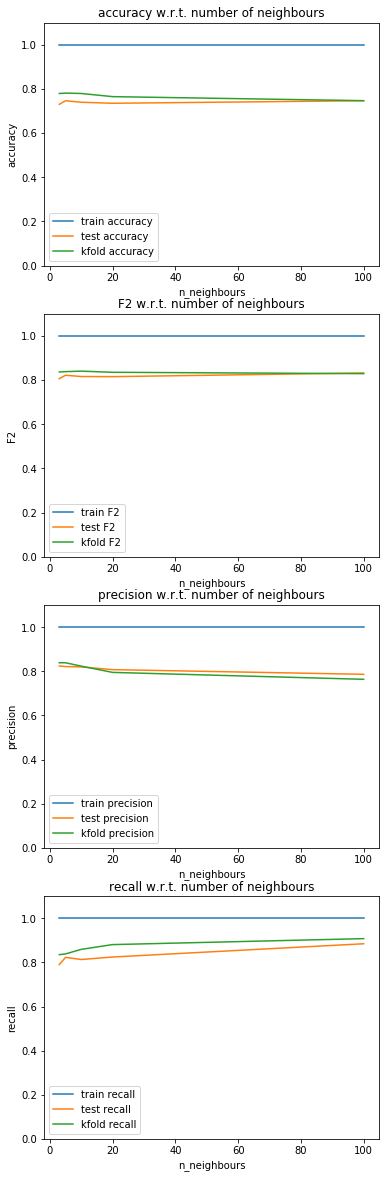

In [9]:
from utils.metrics import VALUE_PARAMETERS

for parameter_i in range(len(VALUE_PARAMETERS)):
    plt.subplot(len(VALUE_PARAMETERS), 1, parameter_i + 1)
    plt.title('{} w.r.t. number of neighbours'.format(VALUE_PARAMETERS[parameter_i]))
    plt.xlabel('n_neighbours')
    plt.ylabel(VALUE_PARAMETERS[parameter_i])
    plt.plot(n_neighbours, [train_error[parameter_i] for train_error in train_errors], label='train {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(n_neighbours, [test_error[parameter_i] for test_error in test_errors], label='test {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(n_neighbours, [cross_val_score[parameter_i] for cross_val_score in cross_val_scores], label='kfold {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.ylim(0,1.1)
    plt.legend()
    plt.subplots_adjust(top=4)


In [10]:
from utils.metrics import ALL_PARAMETERS
best_parameter_to_use = 1  # F2
results = []

train_final_errors = [train_error[best_parameter_to_use] for train_error in train_errors]
best_train_error = max(train_final_errors)
best_train_error_index = train_final_errors.index(max(train_final_errors))
results.append(list(train_errors[best_train_error_index]))


test_final_errors = [test_error[best_parameter_to_use] for test_error in test_errors]
best_test_error = max(test_final_errors)
best_test_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(test_errors[best_train_error_index]))

kfold_final_errors = [kfold_error[best_parameter_to_use] for kfold_error in cross_val_scores]
best_kfold_error = max(kfold_final_errors)
best_kfold_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(cross_val_scores[best_train_error_index]))

result = pd.DataFrame(results, columns=ALL_PARAMETERS)
result['data'] = ['train', 'test', 'kfold']
result


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>accuracy</th>
      <th>F2</th>
      <th>precision</th>
      <th>recall</th>
      <th>confusion_matrix</th>
      <th>data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>[[1130, 0], [0, 2369]]</td>
      <td>train</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.730947</td>
      <td>0.806959</td>
      <td>0.824027</td>
      <td>0.790584</td>
      <td>[[146, 104], [129, 487]]</td>
      <td>test</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.779935</td>
      <td>0.837093</td>
      <td>0.838825</td>
      <td>0.835368</td>
      <td>[[750, 380], [390, 1979]]</td>
      <td>kfold</td>
    </tr>
  </tbody>
</table>
</div>

In [11]:
name = 'knn_distance_{}.csv'.format(FEATURES_SOURCE)
result.to_csv('./result/models/{}'.format(name), index=False)

<h1> Redundant </h1>

In [85]:
[max(train_final_errors), depths[train_final_errors.index(max(train_final_errors))]]


[1.0, 16]

In [86]:
[max(test_final_errors), depths[test_final_errors.index(max(test_final_errors))]]


[1.0, 1]

In [87]:
[max(cross_final_errors), depths[cross_final_errors.index(max(cross_final_errors))]]


[0.9742043551088777, 2]

In [89]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_X, train_Y)
predictions_train = dt.predict(train_X).reshape(-1, 1)
train_error = get_metrics(train_Y, predictions_train)
predictions = dt.predict(test_X).reshape(-1, 1)
test_error = get_metrics(test_Y, predictions)


In [93]:
test_error

(0.7367205542725174, 0.8438356164383561, 0.7298578199052133, 1.0)